In [734]:
import numpy
import numpy as np
import pandas
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.spatial.distance import cityblock
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans

inline_rc = dict(mpl.rcParams)

CARGAMOS LOS DATOS DE yelp_academic_dataset_review.json

In [735]:

reviews = []
with open('data/yelp_academic_dataset_review.json') as fl:
    i=0
    for review in fl:
        reviews.append(json.loads(review))
        i+=1
        if i + 1 > 100:
            break

df_review = pd.DataFrame(reviews)
print(df_review.head())

"""

df_review = pd.read_csv('data/yelp_reviews.csv')
print(df_review)

"""

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

"\n\ndf_review = pd.read_csv('data/yelp_reviews.csv')\nprint(df_review)\n\n"

CARGAMOS LOS DATOS DE yelp_academic_dataset_business.json

In [736]:
'''business = []
with open('data/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        business.append(json.loads(line))

df_business = pd.DataFrame(business)
print(df_business.head())
'''


"business = []\nwith open('data/yelp_academic_dataset_business.json') as fl:\n    for i, line in enumerate(fl):\n        business.append(json.loads(line))\n\ndf_business = pd.DataFrame(business)\nprint(df_business.head())\n"

ELIMINAMOS LAS COLUMNAS INNECESARIAS

COMPROBAMOS

In [737]:
df_review = df_review.drop(["review_id", "user_id","business_id", "useful", "funny", "cool", "date","stars"], axis=1)
#df_business = df_business.drop(["name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "hours"], axis=1)

In [738]:
print(df_review.head())
print(df_review.tail())
#print(df_business.head())

                                                text
0  If you decide to eat here, just be aware it is...
1  I've taken a lot of spin classes over the year...
2  Family diner. Had the buffet. Eclectic assortm...
3  Wow!  Yummy, different,  delicious.   Our favo...
4  Cute interior and owner (?) gave us tour of up...
                                                 text
95  Had to wait until my third trip to NOLA to act...
96  A GREAT EXPERIENCE!!!!!!!!!  I was a completel...
97  Wow! I never thought my sons phone could be re...
98  Service and management terrible... After messi...
99  I have been to a number of dog friendly hotels...


In [739]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

vectorizer = TfidfVectorizer(stop_words='english')
lemma = WordNetLemmatizer()

words = []
for r in df_review["text"]: #Por cada review
    txt = word_tokenize(r.lower()) #Separa la review en palabras
    newtxt = ""
    for w in txt: #Por cada palabra en txt
        l = lemma.lemmatize(w) #se hace lo de quitar mayusculas y quitar raice y eso
        newtxt += l+" "
    words.append(newtxt)

X = vectorizer.fit_transform(words)
bow = vectorizer.get_feature_names()

print(X)
print(len(bow))

  (0, 1139)	0.19606453697664555
  (0, 998)	0.12150216086199521
  (0, 1568)	0.1595645184258279
  (0, 1189)	0.11081598872622064
  (0, 411)	0.16845333883963365
  (0, 994)	0.19606453697664555
  (0, 1548)	0.16845333883963365
  (0, 1562)	0.1281566832500192
  (0, 1338)	0.16845333883963365
  (0, 1080)	0.16845333883963365
  (0, 1518)	0.29232260423961864
  (0, 1608)	0.19606453697664555
  (0, 1550)	0.17991302146651175
  (0, 291)	0.13195332028881596
  (0, 842)	0.2723006156387319
  (0, 625)	0.08439396960287342
  (0, 566)	0.07574730518480213
  (0, 505)	0.23710020796559475
  (0, 110)	0.16845333883963365
  (0, 962)	0.19606453697664555
  (0, 838)	0.1281566832500192
  (0, 818)	0.0895410593113517
  (0, 1556)	0.1281566832500192
  (0, 1460)	0.17376887835582408
  (0, 937)	0.17991302146651175
  :	:
  (99, 1485)	0.172787011274669
  (99, 682)	0.0863935056373345
  (99, 407)	0.0863935056373345
  (99, 626)	0.059875934174642854
  (99, 706)	0.0863935056373345
  (99, 335)	0.07662223673291081
  (99, 142)	0.0766222367

/home/hugo/anaconda3/envs/env3.10/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [740]:
X = X.toarray()
X = pd.DataFrame(X)

In [741]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import cityblock
from scipy.spatial import distance

def createDistanceMatrix(samples, numAtributes, distanceType):

    pca = PCA(n_components=numAtributes)
    pca.fit(samples)
    samples = pca.transform(samples)

    distance_matrix = np.zeros((len(samples),len(samples)))
    terminado = False
    i = 0
    j = 0
    for i in range(distance_matrix.shape[0]):
        for j in range(i,distance_matrix.shape[0]):
            if i!=j:
                if (distanceType == 'manhattan'):
                    distancia = float(cityblock(samples[i],samples[j]))
                elif(distanceType == 'euclidean'):
                    distancia = float(distance.euclidean(samples[i],samples[j]))
                else:
                    distancia = float(distance.minkowski(samples[i],samples[j]))
                distance_matrix[i,j] = distancia #Meto en la matriz la distancia do vece
                distance_matrix[j,i] = distancia
            elif i == j:
                distance_matrix[i,j] = 10**4 #Pone un valor muy grande para que nunca salga como la distancia más pequeña entrela misma instancia
    distance_matrix = pd.DataFrame(distance_matrix)
    return distance_matrix

def calculateMin(distance_matrix):
    minimumValues=np.matrix(distance_matrix).argmin(axis = 1).tolist()
    minn=distance_matrix.iloc[minimumValues[0][0],0]
    y=0
    x=minimumValues[0][0]

    for i in range(1,len(minimumValues)-1):
        if distance_matrix.iloc[minimumValues[i][0],i] < minn:
            minn=distance_matrix.iloc[minimumValues[i][0],i]
            x=minimumValues[i][0]
            y=i

    return x,y,minn

def mergeClusters(distance_matrix,newValues,x,y):

        if x>y:
            label = str(distance_matrix.columns[y]) + '-' + str(distance_matrix.columns[x])
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[x].name], axis=1) #Quito las filas y columnas de las instancias que se han mergeado
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[x].name], axis=0)
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[y].name:  label}, axis='columns')
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[y].name:  label}, axis='rows')
        else:
            label = str(distance_matrix.columns[y]) + '-' + str(distance_matrix.columns[x])
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[y].name], axis=1) #Quito las filas y columnas de las instancias que se han mergeado
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[y].name], axis=0)
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[x].name:  label}, axis='columns')
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[x].name:  label}, axis='rows')

        distance_matrix.loc[label]=newValues
        distance_matrix.loc[:, label]=newValues

        return distance_matrix

In [742]:
def completeLink(node1,node2,minn,lenMatrix):
    deleted = False
    newValues = []
    for i in range(0,lenMatrix):
        if((node1[i] == minn or node2[i] == minn) and not deleted):
            newValues.append(float(10**4))
            deleted = True
        elif((node1[i] == minn or node2[i] == minn) and deleted):
            pass
        elif(node1[i]>=node2[i]):
                newValues.append(float(node1[i]))
        else:
                newValues.append(float(node2[i]))

    return newValues

def singleLink(node1,node2,minn,lenMatrix):
    deleted = False
    newValues = []
    for i in range(0,lenMatrix):
        if((node1[i] == minn or node2[i] == minn) and not deleted):
            newValues.append(float(10**4))
            deleted = True
        elif((node1[i] == minn or node2[i] == minn) and deleted):
            pass
        elif(node1[i]<=node2[i]):
                newValues.append(float(node1[i]))
        else:
                newValues.append(float(node2[i]))

    return newValues

def averageLink(node1,node2,minn,lenMatrix):
    deleted = False
    newValues = []
    for i in range(0,lenMatrix):
        if((node1[i] == minn or node2[i] == minn) and not deleted):
            newValues.append(float(10**4))
            deleted = True
        elif((node1[i] == minn or node2[i] == minn) and deleted):
            pass

        else:
                newValues.append((node1[i]+node2[i])/2)

    return newValues

In [743]:
def hierarchicalClustering(distance_matrix,linkType, nClusters):

    print(distance_matrix)

    for samples in range(1, len(distance_matrix)-nClusters+1):
        print('-----------------------------')
        print('iteración número:', samples)

        x,y,minn = calculateMin(distance_matrix)

        node1 = distance_matrix.iloc[y].array
        node2 = distance_matrix.iloc[x].array

        if linkType == 'single':
            newValues = singleLink(node1,node2,minn,len(distance_matrix))
        elif linkType == 'complete':
            newValues = completeLink(node1,node2,minn,len(distance_matrix))
        elif linkType == 'average':
            newValues = averageLink(node1,node2,minn,len(distance_matrix))

        distance_matrix = mergeClusters(distance_matrix,newValues,x,y)


        #print('La matriz de distancias después de la iteración', samples)
        #print(distance_matrix)
        #print('-----------------------------')

    return distance_matrix

In [744]:
linkType = 'average'
distanceType = 'euclidean'
nClusters = 4
distance_matrix = hierarchicalClustering(createDistanceMatrix(X, 5, distanceType), linkType, nClusters)
distance_matrix

              0             1             2             3             4   \
0   10000.000000      0.318729      0.345428      0.378138      0.521251   
1       0.318729  10000.000000      0.396860      0.171835      0.331632   
2       0.345428      0.396860  10000.000000      0.509183      0.514498   
3       0.378138      0.171835      0.509183  10000.000000      0.320630   
4       0.521251      0.331632      0.514498      0.320630  10000.000000   
..           ...           ...           ...           ...           ...   
95      0.246741      0.136394      0.347570      0.171398      0.334920   
96      0.277732      0.351521      0.486171      0.314512      0.538010   
97      0.250804      0.200550      0.379792      0.279878      0.459200   
98      0.293997      0.402029      0.515343      0.401289      0.566782   
99      0.191984      0.263728      0.314677      0.282056      0.411479   

          5         6         7         8         9   ...        90        91  \
0   0.

,0-45-93-5-23-43-68-75-34-63-76-72-9-13-27-94-24-21-79-50-44-60-57-82-65,1-22-18-35-88-3-8-12-14-31-62-55-16-17-99-29-37-20-95-86-46-53-83-77-38-40-61-92-84-78-91-4-66-2-15-30-56-67-32-36-7-71-28-41-48-6-70-10-73-42-98-25-85-47-49-81-33-96-80-87-11-39-64-89-97-54-74-19-52,26-58-90-51,59-69
0-45-93-5-23-43-68-75-34-63-76-72-9-13-27-94-24-21-79-50-44-60-57-82-65,10000.000000,0.533172,0.609146,0.623409
1-22-18-35-88-3-8-12-14-31-62-55-16-17-99-29-37-20-95-86-46-53-83-77-38-40-61-92-84-78-91-4-66-2-15-30-56-67-32-36-7-71-28-41-48-6-70-10-73-42-98-25-85-47-49-81-33-96-80-87-11-39-64-89-97-54-74-19-52,0.533172,10000.000000,0.597732,0.546122
26-58-90-51,0.609146,0.597732,10000.000000,0.687058
59-69,0.623409,0.546122,0.687058,10000.000000


In [745]:
centroids = []
for label in distance_matrix.columns:
    label = str(label).split('-')
    centroid = X.iloc[int(label.pop())]
    for i in label:
        newInstance = X.iloc[int(i)]
        for atr in range(0, len(centroid)):
            centroid[atr] = ((centroid[atr] + newInstance[atr])/2)

    centroids.append(centroid)

centroids = pd.DataFrame(centroids)

print(centroids)


        0             1             2         3             4     \
65  0.000000  1.026584e-05  0.000000e+00  0.000000  0.000000e+00   
52  0.000011  1.122481e-15  2.236188e-07  0.000026  1.378930e-15   
51  0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000e+00   
69  0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000e+00   

            5             6         7             8         9     ...  \
65  0.000000e+00  3.292618e-08  0.000000  0.000000e+00  0.000000  ...   
52  1.933651e-17  0.000000e+00  0.003596  3.704923e-09  0.008284  ...   
51  0.000000e+00  0.000000e+00  0.000000  0.000000e+00  0.000000  ...   
69  0.000000e+00  0.000000e+00  0.000000  0.000000e+00  0.000000  ...   

        1604      1605          1606      1607          1608          1609  \
65  0.000018  0.000000  2.812583e-07  0.000003  1.168636e-08  0.000000e+00   
52  0.032974  0.000048  0.000000e+00  0.000000  0.000000e+00  1.089879e-10   
51  0.000000  0.010651  0.000000e+00  0.000000  0.000000e+0

In [746]:
# Visualizacion de los clusters

for n in range(0, nClusters):
    cluster = centroids.iloc[n].to_list()
    clusterSort = np.sort(cluster)
    relWords = []
    for i in range(1, 15):
        value = clusterSort[len(cluster)-i]
        relWords.append(bow[cluster.index(value)])

    print('Palabras relevantes del topico ' + str(list(centroids.index.values)[n]) + ': ')
    print(relWords)
    print('-----------------------------------------------------------------------------')


Palabras relevantes del topico 65: 
['local', 'place', 'dedicated', 'dedicated', 'dedicated', 'dedicated', 'beer', 'bartender', 'saw', 'plate', 'chain', 'cold', 'looked', 'good']
-----------------------------------------------------------------------------
Palabras relevantes del topico 52: 
['level', 'perfect', 'soup', 'job', 'wash', 'thank', 'business', 'business', 'business', 'business', 'did', 'absolute', 'just', 'satisfied']
-----------------------------------------------------------------------------
Palabras relevantes del topico 51: 
['thai', 'wa', 'coconut', 'soup', 'pad', 'used', 'great', 'carp', 'carp', 'carp', 'carp', 'change', 'change', 'change']
-----------------------------------------------------------------------------
Palabras relevantes del topico 69: 
['breakfast', 'impeccable', 'impeccable', 'service', 'family', 'weekend', '295', '295', 'highly', 'food', 'diner', 'diner', 'recommend', 'lunch']
------------------------------------------------------------------------

In [747]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
# Cambio de base a dos dimensiones PCA
X = pca.transform(X)

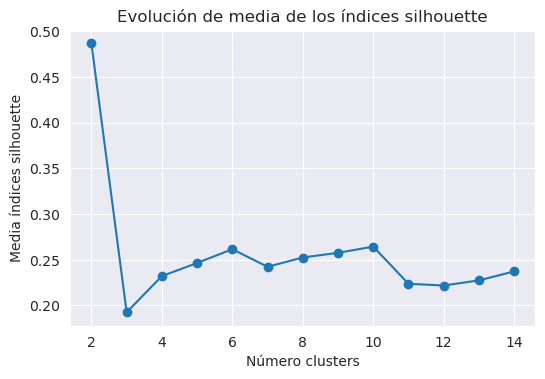

In [748]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [749]:
import plotly.figure_factory as ff
import numpy as np

fig = ff.create_dendrogram(X)
fig.update_layout(width=1300, height=1000)
fig.show()